In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [260]:
bikeData = pd.read_csv('./day.csv')

In [261]:
# Check the head of the dataset
bikeData.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [262]:
#Determining the number of rows and columns
bikeData.shape    

(730, 16)

### Data Cleaning

In [263]:
# Check the descriptive information
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [264]:
## No blank rows as datatype is non-null as per above data so null handling not required .
#However removing redundant columns as per observation
bikeData.drop(['instant','dteday'],axis=1,inplace=True)

### These variables 'instant'  & 'dteday' are not necessary as instant is serial number and dteday can be obtained from Mnth and yr .

In [265]:
bikeData[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


In [266]:
bikeData[['temp','atemp','hum','windspeed']].corr()

,temp,atemp,hum,windspeed
temp,1.000000,0.991696,0.128565,-0.158186
atemp,0.991696,1.000000,0.141512,-0.183876
hum,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.158186,-0.183876,-0.248506,1.000000


In [267]:
#Since temp and atemp is highly coorelated hence dropping these 
# one to remove redundancy.
bikeData.drop(['atemp'],axis=1,inplace=True)


In [268]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  casual      730 non-null    int64  
 11  registered  730 non-null    int64  
 12  cnt         730 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 74.3 KB


In [269]:
# Again as we need to data overall for comparing with CNT which combination of casual and registered user 
# hence dropping other two and keeping cnt.'
bikeData.drop(['casual','registered'],axis=1,inplace=True)
bikeData.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [270]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [271]:
bikeData[['season', 'yr', 'mnth', 'holiday', 'workingday','weekday', 'weathersit', 'temp','hum', 'windspeed',
       'cnt']].corr()

,season,yr,mnth,holiday,workingday,weekday,weathersit,temp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.013762,-0.003081,0.021306,0.333361,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.002945,-0.005466,-0.050322,0.048789,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004688,0.009523,0.045613,0.219083,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.252948,-0.101962,-0.034395,-0.028764,-0.015662,0.006257,-0.068764
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,1.000000,0.035800,0.060236,0.053470,0.023202,-0.018666,0.062542
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,0.035800,1.000000,0.031112,-0.000168,-0.052290,0.014283,0.067534
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.060236,0.031112,1.000000,-0.119503,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.053470,-0.000168,-0.119503,1.000000,0.128565,-0.158186,0.627044
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.023202,-0.052290,0.590277,0.128565,1.000000,-0.248506,-0.098543
windspeed,-2.296069e-01,-1.162435e-02,-2.080131e-01,0.006257,-0.018666,0.014283,0.039769,-0.158186,-0.248506,1.000000,-0.235132


In [272]:
#from info lets convert few int variables to categorcial vaiabales:
# season,yr,mnth,holiday,workingday,weathersit all are categorical variables
# we will convert them to cateogry type to create dummies later.
bike_new=bikeData[['season', 'yr', 'mnth', 'holiday', 'workingday','weekday', 'weathersit', 'temp','hum', 'windspeed',
       'cnt']]


In [273]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


In [274]:

# Convert to 'category' data type

bike_new['season']=bike_new['season'].astype('category')
bike_new['weathersit']=bike_new['weathersit'].astype('category')
bike_new['mnth']=bike_new['mnth'].astype('category')
bike_new['workingday']=bike_new['workingday'].astype('category')
bike_new['weekday']=bike_new['weekday'].astype('category')

In [275]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   workingday  730 non-null    category
 5   weekday     730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(5), float64(3), int64(3)
memory usage: 39.1 KB


In [276]:
# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

bike_new = pd.get_dummies(bike_new, drop_first=True)
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   temp          730 non-null    float64
 3   hum           730 non-null    float64
 4   windspeed     730 non-null    float64
 5   cnt           730 non-null    int64  
 6   season_2      730 non-null    uint8  
 7   season_3      730 non-null    uint8  
 8   season_4      730 non-null    uint8  
 9   mnth_2        730 non-null    uint8  
 10  mnth_3        730 non-null    uint8  
 11  mnth_4        730 non-null    uint8  
 12  mnth_5        730 non-null    uint8  
 13  mnth_6        730 non-null    uint8  
 14  mnth_7        730 non-null    uint8  
 15  mnth_8        730 non-null    uint8  
 16  mnth_9        730 non-null    uint8  
 17  mnth_10       730 non-null    uint8  
 18  mnth_11       730 non-null    

In [277]:
bike_new.shape

(730, 29)

## Training and testing THE DATA
####  Training and testing the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
#### We will use train_test_split method from sklearn package for this

In [278]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [279]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   temp          510 non-null    float64
 3   hum           510 non-null    float64
 4   windspeed     510 non-null    float64
 5   cnt           510 non-null    int64  
 6   season_2      510 non-null    uint8  
 7   season_3      510 non-null    uint8  
 8   season_4      510 non-null    uint8  
 9   mnth_2        510 non-null    uint8  
 10  mnth_3        510 non-null    uint8  
 11  mnth_4        510 non-null    uint8  
 12  mnth_5        510 non-null    uint8  
 13  mnth_6        510 non-null    uint8  
 14  mnth_7        510 non-null    uint8  
 15  mnth_8        510 non-null    uint8  
 16  mnth_9        510 non-null    uint8  
 17  mnth_10       510 non-null    uint8  
 18  mnth_11       510 non-null  

In [280]:
df_train.shape

(510, 29)

In [281]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   temp          219 non-null    float64
 3   hum           219 non-null    float64
 4   windspeed     219 non-null    float64
 5   cnt           219 non-null    int64  
 6   season_2      219 non-null    uint8  
 7   season_3      219 non-null    uint8  
 8   season_4      219 non-null    uint8  
 9   mnth_2        219 non-null    uint8  
 10  mnth_3        219 non-null    uint8  
 11  mnth_4        219 non-null    uint8  
 12  mnth_5        219 non-null    uint8  
 13  mnth_6        219 non-null    uint8  
 14  mnth_7        219 non-null    uint8  
 15  mnth_8        219 non-null    uint8  
 16  mnth_9        219 non-null    uint8  
 17  mnth_10       219 non-null    uint8  
 18  mnth_11       219 non-null   

In [282]:
df_test.shape

(219, 29)

# EXPLORATORY DATA ANALYSIS
We need to perform the EDA on TRAINING (df_train) Dataset.
## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables.

In [283]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   temp          510 non-null    float64
 3   hum           510 non-null    float64
 4   windspeed     510 non-null    float64
 5   cnt           510 non-null    int64  
 6   season_2      510 non-null    uint8  
 7   season_3      510 non-null    uint8  
 8   season_4      510 non-null    uint8  
 9   mnth_2        510 non-null    uint8  
 10  mnth_3        510 non-null    uint8  
 11  mnth_4        510 non-null    uint8  
 12  mnth_5        510 non-null    uint8  
 13  mnth_6        510 non-null    uint8  
 14  mnth_7        510 non-null    uint8  
 15  mnth_8        510 non-null    uint8  
 16  mnth_9        510 non-null    uint8  
 17  mnth_10       510 non-null    uint8  
 18  mnth_11       510 non-null  

In [284]:
df_train.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'season_2',
       'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'workingday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

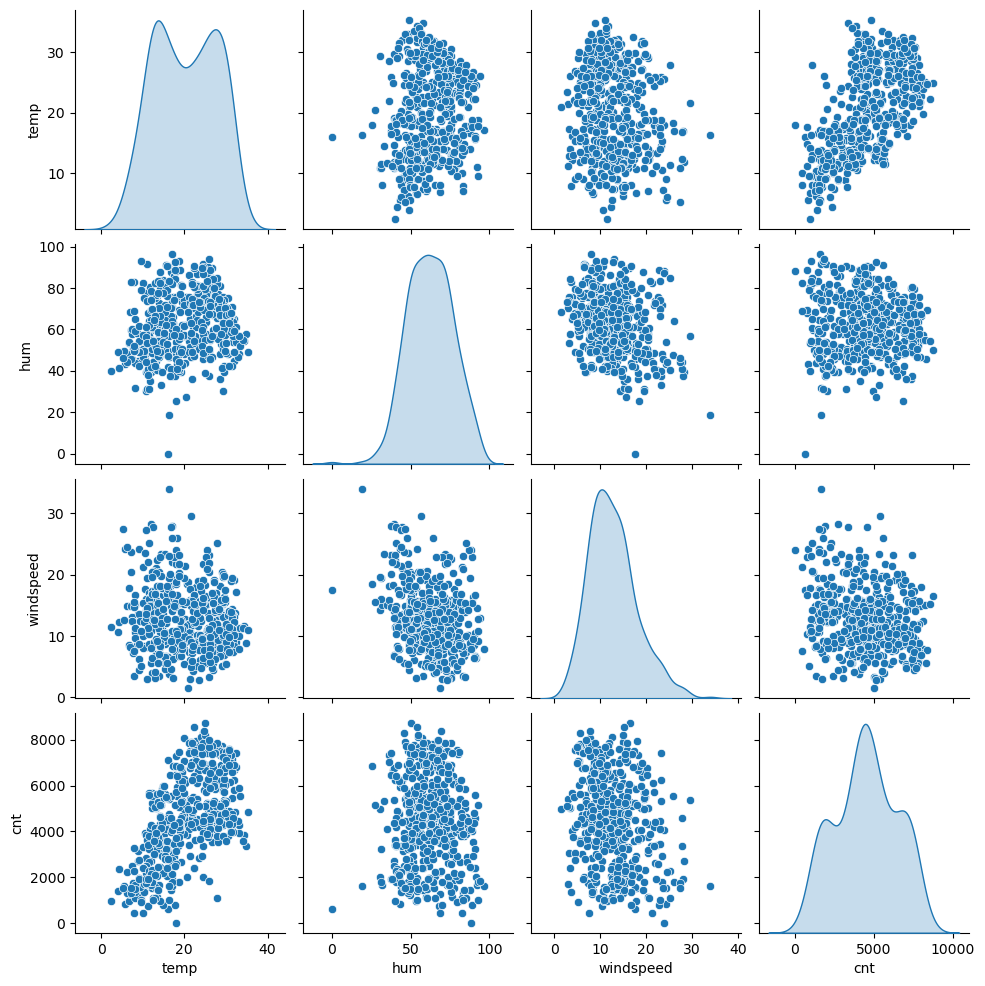

In [285]:
# Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp','hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

## Visualising Catagorical Variables

In [286]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   temp          510 non-null    float64
 3   hum           510 non-null    float64
 4   windspeed     510 non-null    float64
 5   cnt           510 non-null    int64  
 6   season_2      510 non-null    uint8  
 7   season_3      510 non-null    uint8  
 8   season_4      510 non-null    uint8  
 9   mnth_2        510 non-null    uint8  
 10  mnth_3        510 non-null    uint8  
 11  mnth_4        510 non-null    uint8  
 12  mnth_5        510 non-null    uint8  
 13  mnth_6        510 non-null    uint8  
 14  mnth_7        510 non-null    uint8  
 15  mnth_8        510 non-null    uint8  
 16  mnth_9        510 non-null    uint8  
 17  mnth_10       510 non-null    uint8  
 18  mnth_11       510 non-null  

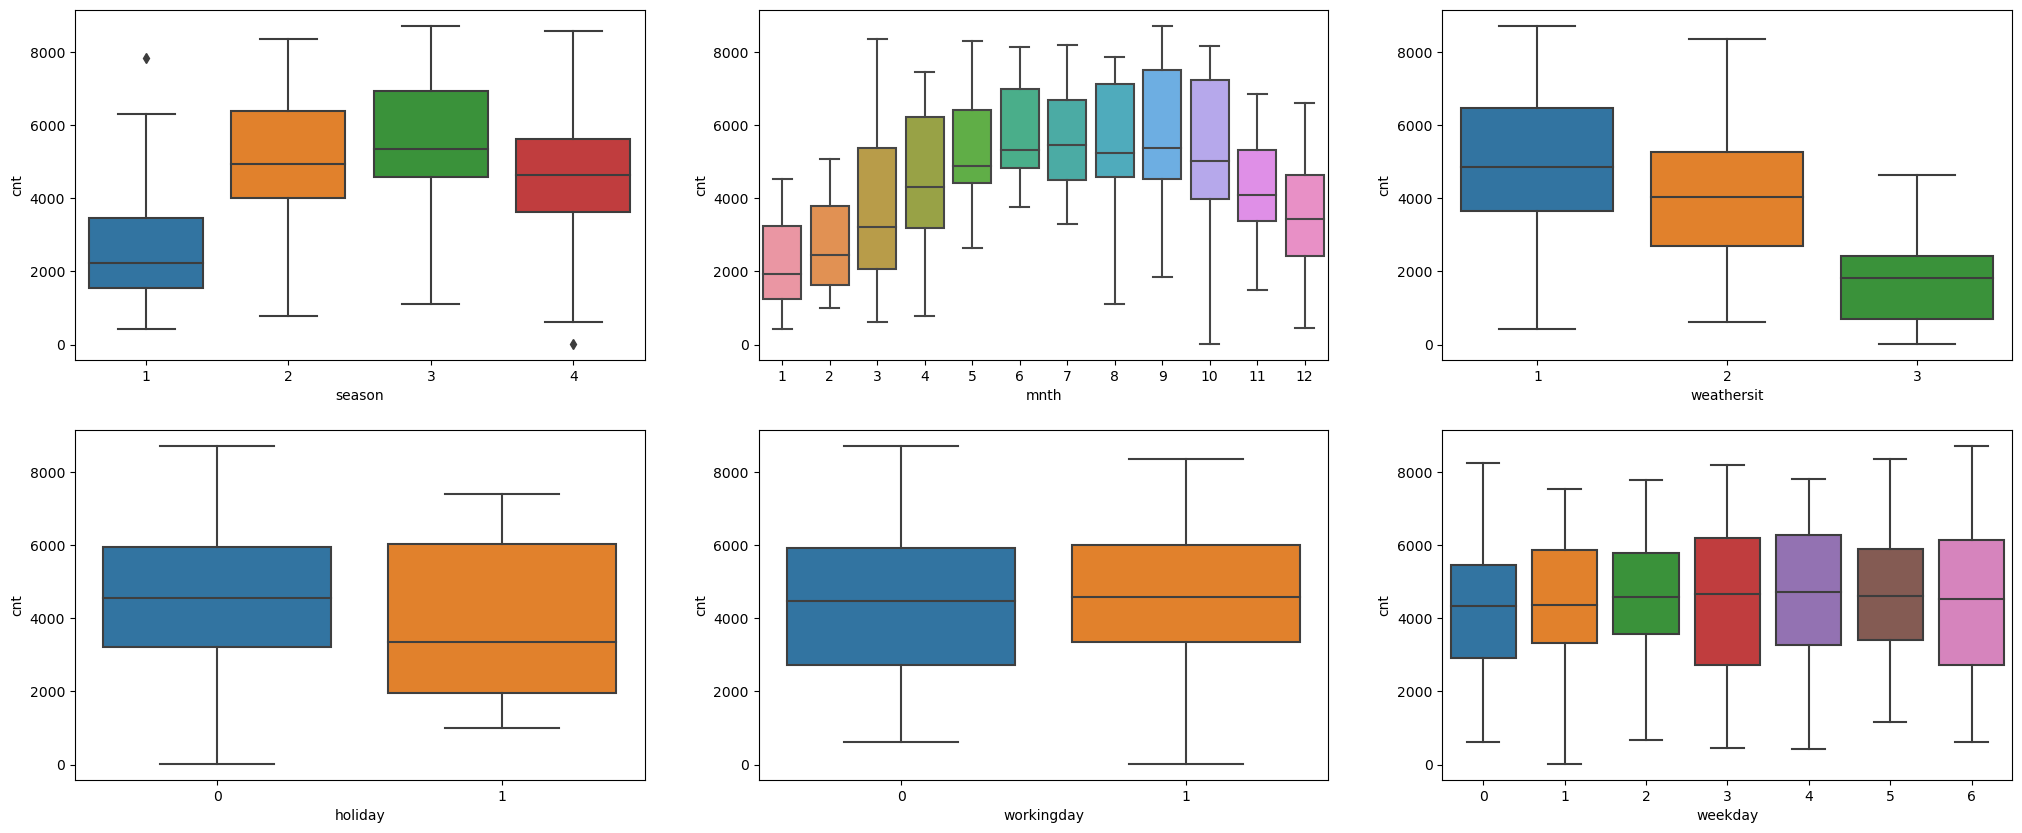

In [287]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeData)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeData)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeData)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeData)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeData)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeData)
plt.show()

## Observations
There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

The inference that We could derive were:

- season: Most of bike booking happens in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 of total booking. This indicates, season can be a good predictor for the dependent variable.

- mnth: Most bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- weathersit: Most of bikebooking happens ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 . This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

- holiday: Almost all the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

- workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

- weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

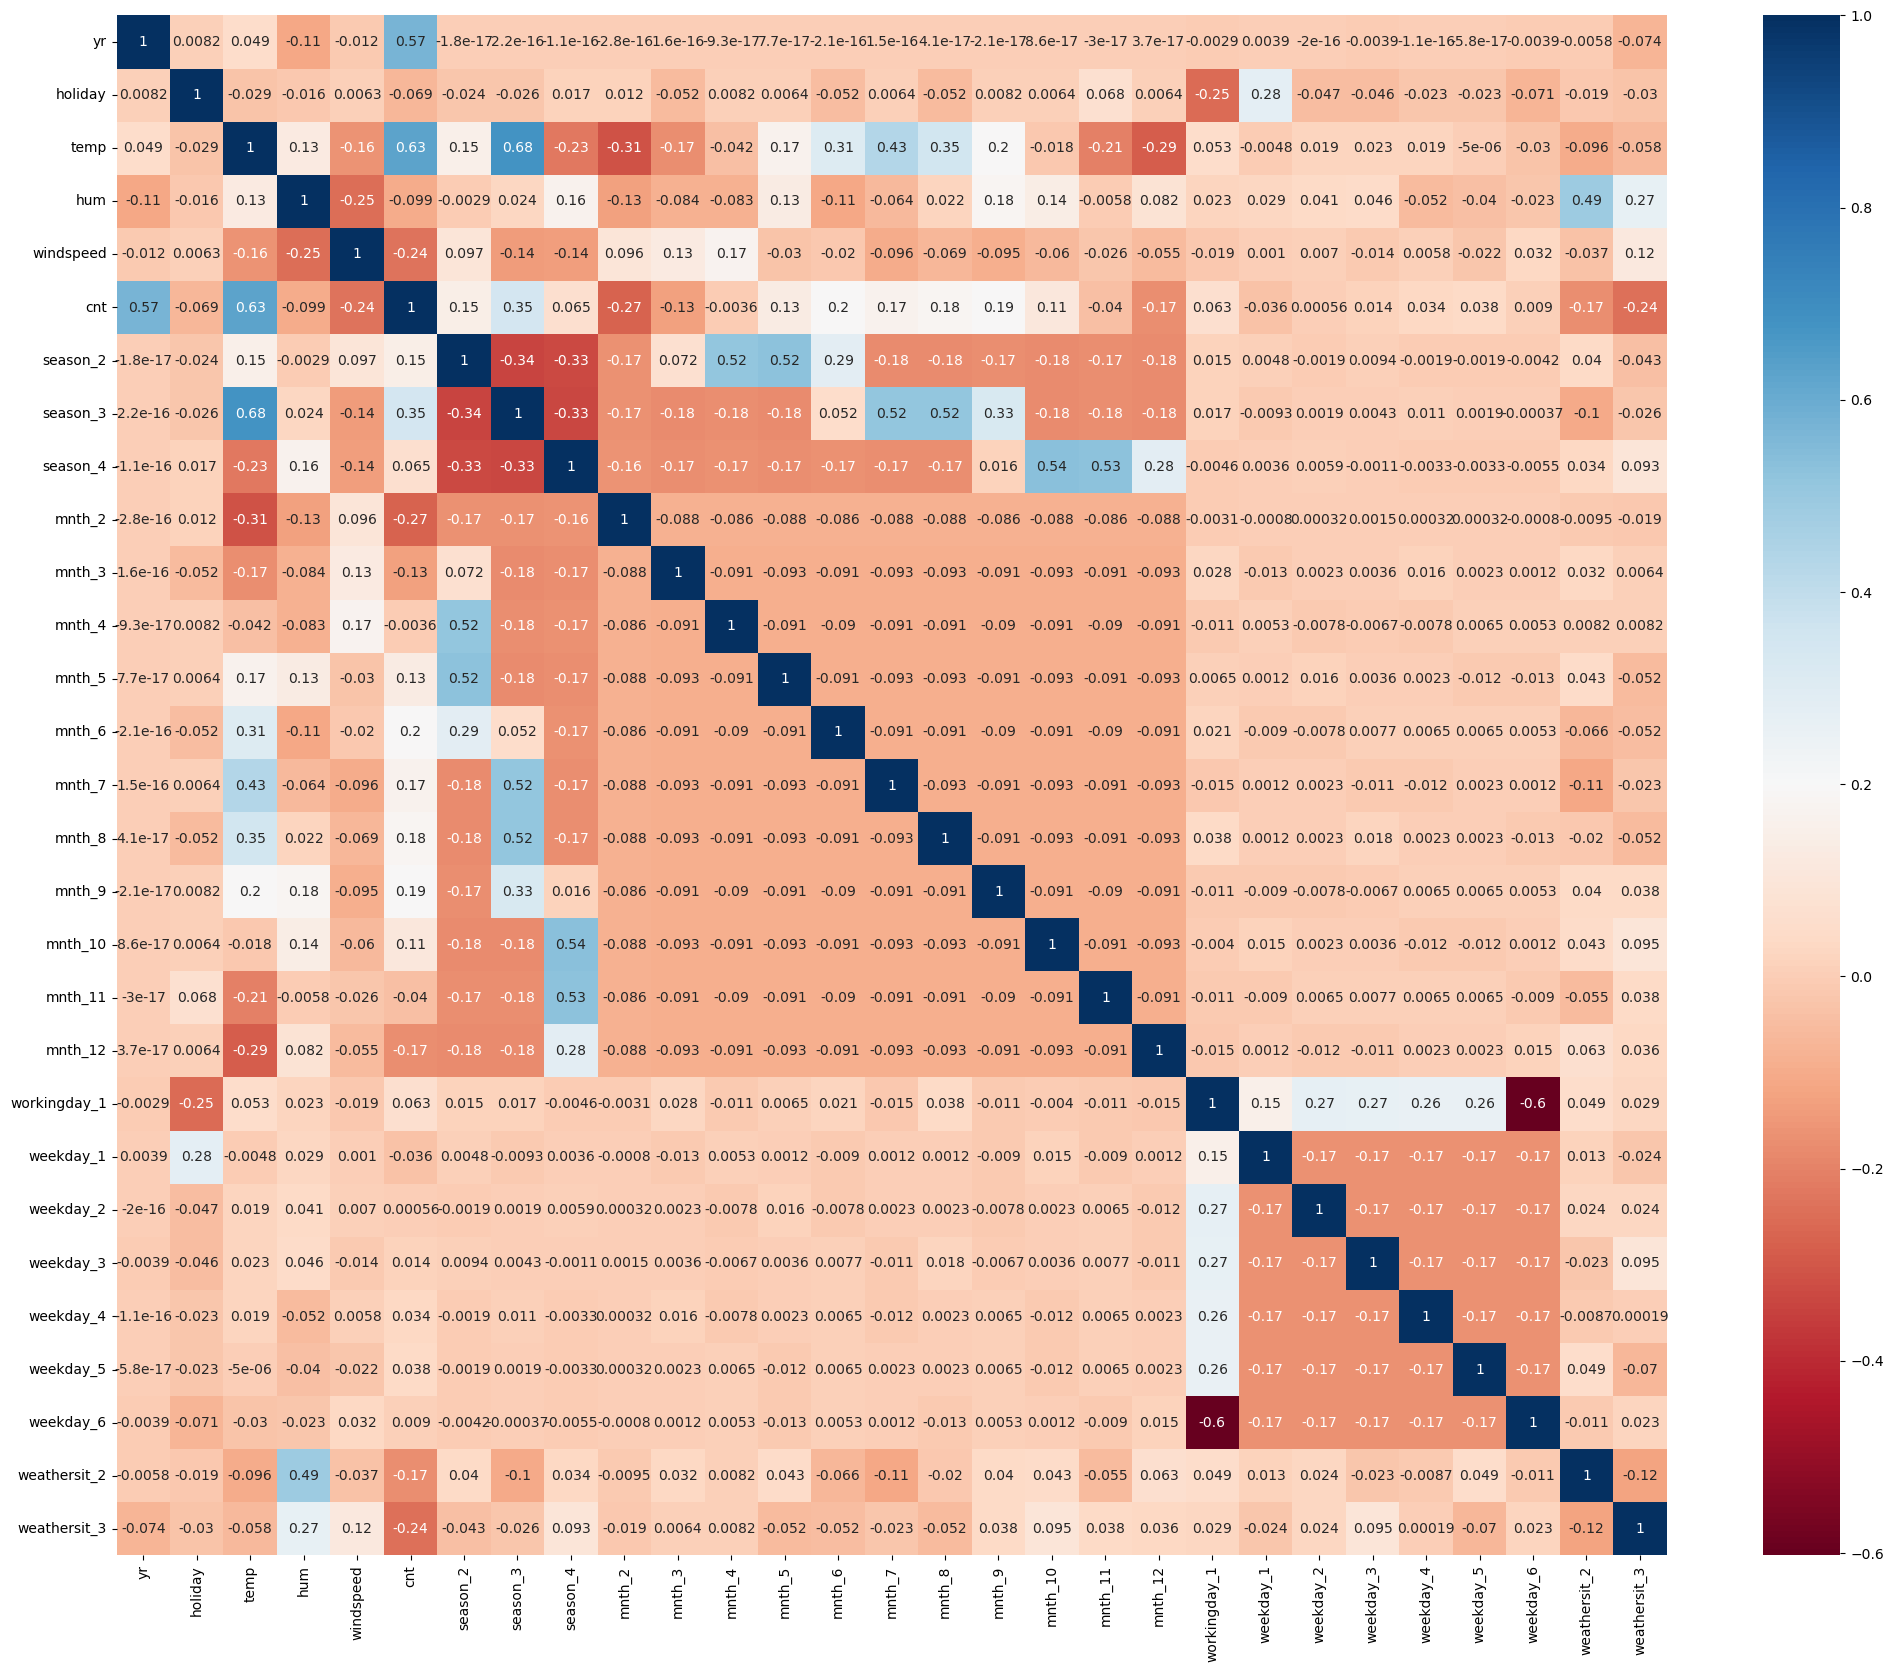

In [288]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

## Observations:
The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## RESCALING THE FEATURES

In [289]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [290]:
# Checking the values before scaling
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,mnth_12,workingday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,18.791653,58.7083,7.832836,6304,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,16.126653,49.4583,9.791514,7109,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,31.638347,55.0833,10.500039,4266,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
714,1,0,14.862500,83.8750,6.749714,3786,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8,0,0,5.671653,43.4167,24.250650,822,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [291]:
df_train.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'cnt', 'season_2',
       'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'workingday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [292]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [293]:
# Checking values after scaling
df_train.head()

,yr,holiday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,mnth_12,workingday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0.497426,0.609956,0.194850,0.722734,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0.416433,0.513852,0.255118,0.815347,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,0.887856,0.572294,0.276919,0.488265,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
714,1,0,0.378013,0.871429,0.161523,0.433042,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8,0,0,0.098690,0.451083,0.700017,0.092039,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
df_train.describe()

,yr,holiday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,mnth_12,workingday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.540901,0.647390,0.346318,0.515144,0.247059,0.262745,0.241176,0.082353,...,0.076471,0.682353,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.227898,0.149722,0.160266,0.224281,0.431725,0.440557,0.428217,0.275172,...,0.266010,0.466018,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.343228,0.536147,0.230784,0.359468,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.540519,0.646367,0.325635,0.516337,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.740406,0.757900,0.434287,0.685861,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## BUILDING A LINEAR MODEL

#### Dividing into X and Y sets for the model building

In [295]:
y_train = df_train.pop('cnt')
X_train = df_train

## RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [296]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [297]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [298]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 14),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('workingday_1', True, 1),
 ('weekday_1', False, 6),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [299]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4',
       'mnth_3', 'mnth_9', 'mnth_10', 'workingday_1', 'weekday_6',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [300]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [301]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'
## Model 1
#### VIF Check

In [302]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.21
2,hum,17.23
5,season_3,7.01
10,workingday_1,4.60
3,windspeed,4.55
4,season_2,3.54
6,season_4,3.01
12,weathersit_2,2.14
0,yr,2.02
11,weekday_6,1.79


In [303]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [304]:
# Check the parameters obtained

lr1.params

const           0.196221
yr              0.228723
temp            0.489280
hum            -0.177805
windspeed      -0.187198
season_2        0.130352
season_3        0.078664
season_4        0.153732
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
workingday_1    0.040773
weekday_6       0.054705
weathersit_2   -0.047620
weathersit_3   -0.271535
dtype: float64

In [305]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.00e-187
Time:                        23:10:40   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

## Model 2
- Removing the variable 'hum' based on its Very High 'VIF' value.
- Even though the VIF of hum is the second highest,  decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [306]:
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

## VIF check

In [307]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,16.81
4,season_3,6.75
2,windspeed,4.27
9,workingday_1,4.11
3,season_2,3.51
5,season_4,2.89
0,yr,2.02
8,mnth_10,1.66
10,weekday_6,1.66
11,weathersit_2,1.54


In [308]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [309]:
lr3.params

const           0.091594
yr              0.233129
temp            0.456709
windspeed      -0.148815
season_2        0.131914
season_3        0.087922
season_4        0.150243
mnth_3          0.055303
mnth_9          0.091371
mnth_10         0.053320
workingday_1    0.042443
weekday_6       0.055451
weathersit_2   -0.077149
weathersit_3   -0.324223
dtype: float64

In [310]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          4.52e-184
Time:                        23:10:42   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

## Model 3
- Removing the variable 'season3' based on its Very High 'VIF' value.
- Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [311]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

In [312]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.92
2,windspeed,4.15
8,workingday_1,4.07
0,yr,2.01
4,season_4,1.98
9,weekday_6,1.66
7,mnth_10,1.63
3,season_2,1.56
10,weathersit_2,1.54
6,mnth_9,1.23


In [313]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [314]:
# Check the parameters obtained

lr4.params

const           0.076726
yr              0.231340
temp            0.568327
windspeed      -0.153306
season_2        0.083704
season_4        0.119733
mnth_3          0.044132
mnth_9          0.102838
mnth_10         0.041927
workingday_1    0.042231
weekday_6       0.056942
weathersit_2   -0.077340
weathersit_3   -0.316638
dtype: float64

In [315]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     200.2
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.56e-181
Time:                        23:10:44   Log-Likelihood:                 488.92
No. Observations:                 510   AIC:                            -951.8
Df Residuals:                     497   BIC:                            -896.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0767      0.020      3.775   

## Model 4
- Removing the variable 'holiday' based on its Very High p-value.

In [316]:
X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

In [317]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.80
2,windspeed,4.11
7,workingday_1,4.07
0,yr,2.00
8,weekday_6,1.66
3,season_2,1.56
9,weathersit_2,1.53
4,season_4,1.41
6,mnth_9,1.20
5,mnth_3,1.15


In [318]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [319]:
# Check the parameters obtained

lr5.params

const           0.074194
yr              0.230191
temp            0.575607
windspeed      -0.156154
season_2        0.082553
season_4        0.134820
mnth_3          0.044834
mnth_9          0.096439
workingday_1    0.042294
weekday_6       0.057422
weathersit_2   -0.075711
weathersit_3   -0.311216
dtype: float64

In [320]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.39e-181
Time:                        23:10:45   Log-Likelihood:                 486.24
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     498   BIC:                            -897.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0742      0.020      3.640   

## Model 5

- Removing the variable 'mnth_10' based on its High 'p-value'

In [321]:
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [322]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.72
2,windspeed,4.02
6,workingday_1,4.01
0,yr,2.00
7,weekday_6,1.65
3,season_2,1.56
8,weathersit_2,1.52
4,season_4,1.38
5,mnth_9,1.20
9,weathersit_3,1.07


In [323]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [324]:
# Check the parameters obtained

lr6.params

const           0.084143
yr              0.230846
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
workingday_1    0.043203
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992
dtype: float64

In [325]:
# Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     233.8
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          3.77e-181
Time:                        23:10:47   Log-Likelihood:                 482.39
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     499   BIC:                            -896.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0841      0.020      4.168   

# Observations
### This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

## Final Model Interpretation

lr6 model coefficient values are 


**const           0.084143
yr              0.230846
temp            0.563615
windspeed      -0.155191
season_2        0.082706
season_4        0.128744
mnth_9          0.094743
workingday_1    0.043203
weekday_6       0.056909
weathersit_2   -0.074807
weathersit_3   -0.306992**

## Summary
From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS
F Statistics
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

**F-statistic: 233.8
Prob (F-statistic): 3.77e-181
The F-Statistics value of 233 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

The equation of best fitted surface based on model lr6:
**cnt = 0.084143 + (yr × 0.230846) + (temp × 0.563615) − (windspeed × 0.155191) + (season2 × 0.082706) + (season_4 ×0.128744) + (mnth9 × 0.094743) + (workingday_1 × 0.043203) + (weekday_6 × 0.056909)  − (weathersit_2 × 0.074807) − (weathersit3 × 0.306992)**

Interpretation of Coefficients:
**temp: A coefficient value of ‘0.563615’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units.

weathersit_3: A coefficient value of ‘-0.306992’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.306992 units.

weathersit_2: A coefficient value of ‘-0.2753’ indicated that, w.r.t Weathersit1, a unit increase in weathersit_2 variable, decreases the bike hire numbers by 0.2753 units.

weekday_6: A coefficient value of ‘0.056909’ indicated that,w.r.t weekday_1, a unit increase in windspeed variable, increases the bike hire numbers by 0.056909 units.

yr: A coefficient value of ‘0.230846’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.230846 units.

season_4: A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

windspeed: A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

season_2: A coefficient value of ‘0.082706’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units.

mnth_9: A coefficient value of ‘0.094743’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units.

workingday_1: A coefficient value of ‘0.043203’ indicated that w.r.t workingday_1, a unit increase in workingday_1 variable increases the bike hire numbers by 0.043203 units.


const: The Constant value of ‘0.084143’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units.

## ASSUMPTIONS
## Error terms are normally distributed with mean zero (not X, Y)
Residual Analysis Of Training Data

In [326]:
y_train_pred = lr6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

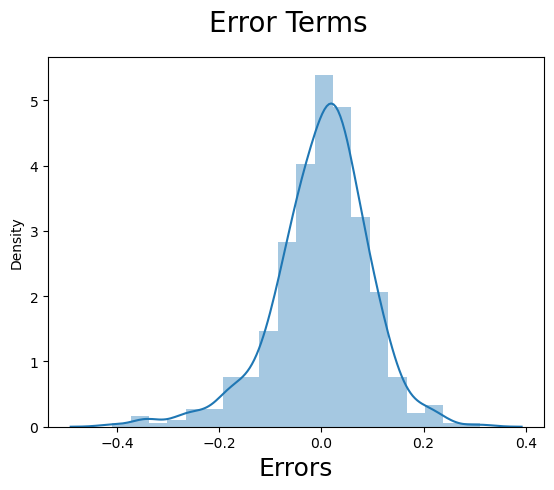

In [327]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Observation
From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### There is a linear relationship between X and Y

In [328]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.72
2,windspeed,4.02
6,workingday_1,4.01
0,yr,2.00
7,weekday_6,1.65
3,season_2,1.56
8,weathersit_2,1.52
4,season_4,1.38
5,mnth_9,1.20
9,weathersit_3,1.07


### Observation
- From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

## MAKING PREDICTION USING FINAL MODEL
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [329]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [330]:
df_test.head()

,yr,holiday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,mnth_12,workingday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0.046591,0.453529,0.462217,0.110907,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0.543115,0.522511,0.347424,0.855729,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0.951196,0.596104,0.212829,0.534975,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0.699909,0.551083,0.478229,0.817648,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,0.407087,0.618615,0.080770,0.428900,0,0,1,0,...,1,1,0,1,0,0,0,0,1,0


In [331]:
df_test.describe()

,yr,holiday,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,...,mnth_12,workingday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.551225,0.662567,0.346706,0.518889,0.264840,0.246575,0.251142,0.059361,...,0.105023,0.684932,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.229463,0.143562,0.159553,0.219953,0.442259,0.432005,0.434663,0.236840,...,0.307285,0.465607,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.046591,0.301299,0.073090,0.055683,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.356479,0.553031,0.232689,0.364703,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.557653,0.662338,0.328208,0.525771,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.751309,0.762338,0.435708,0.676887,1.000000,0.000000,0.500000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,1.010390,0.824380,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [332]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   temp          219 non-null    float64
 3   hum           219 non-null    float64
 4   windspeed     219 non-null    float64
 5   season_2      219 non-null    uint8  
 6   season_3      219 non-null    uint8  
 7   season_4      219 non-null    uint8  
 8   mnth_2        219 non-null    uint8  
 9   mnth_3        219 non-null    uint8  
 10  mnth_4        219 non-null    uint8  
 11  mnth_5        219 non-null    uint8  
 12  mnth_6        219 non-null    uint8  
 13  mnth_7        219 non-null    uint8  
 14  mnth_8        219 non-null    uint8  
 15  mnth_9        219 non-null    uint8  
 16  mnth_10       219 non-null    uint8  
 17  mnth_11       219 non-null    uint8  
 18  mnth_12       219 non-null   

In [333]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   workingday_1  219 non-null    uint8  
 8   weekday_6     219 non-null    uint8  
 9   weathersit_2  219 non-null    uint8  
 10  weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(7)
memory usage: 10.1 KB


In [334]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

## MODEL EVALUATION

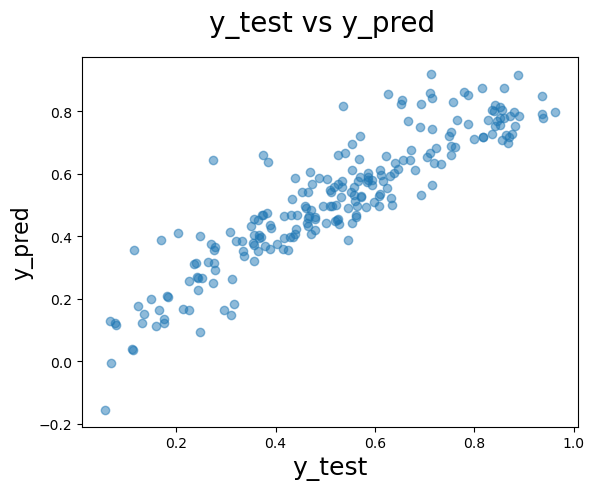

In [335]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### R^2 Value for TEST

In [336]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8203092200749706

### Adjusted R^2 Value for TEST

In [337]:
# We already have the value of R^2 (calculated in above step)

r2=0.8203092200749706

In [338]:
# Get the shape of X_test
X_test.shape

(219, 10)

In [339]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8116702402708826

# Final Result Comparison
- Test R^2 :0.824
- Test Adjusted R^2 :0.821
- Test R^2 :0.820
- Test Adjusted R^2 :0.811
- This seems to be a really good model that can very well 'Generalize' various datasets.
## FINAL REPORT
As per our final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (temp) - A coefficient value of ‘0.563615’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.563615 units.
- Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.306992’ indicated that, w.r.t Weathersit1(Clear and cloudy), a unit increase in Weathersit3(Light_rain_thurnderstorm_snow) variable decreases the bike hire numbers by 0.306992 units.
- Year (yr) - A coefficient value of ‘0.230846’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.230846 units.
###  So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are

- season_4(winter): - A coefficient value of ‘0.1222’ indicated that w.r.t - -season_1(spring), a unit increase in season_4 variable increases the bike hire numbers by 0.1222 units.
- windspeed: - A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

